In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Global variable with list of all the letters
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [3]:
def get_counts(word):
    # This function counts how many times
    # each of the 26 letters occur in the input word
    counts = [word.count(l) for l in LETTERS]
    return counts

In [4]:
# Create an array to hold the count of each letter
counts = np.zeros(len(LETTERS))

# Read words from a Scrabble word list, downloaded from here:
# https://boardgames.stackexchange.com/questions/38366/latest-collins-scrabble-words-list-in-text-file
with open('scrabble.txt') as f:
    for word in [line.strip() for line in f]:
        # Only consider 5-letter words
        if len(word) == 5:
            counts += get_counts(word)

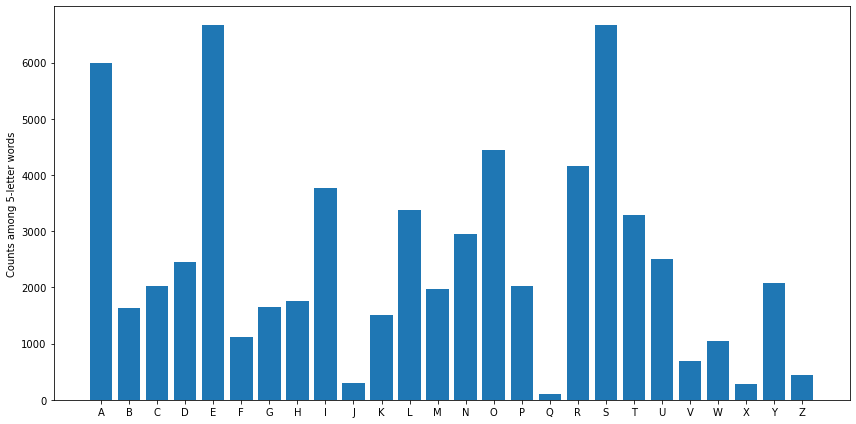

In [5]:
# Plot the results as a histogram
fig = plt.figure(figsize=(12, 6))
plt.bar(range(len(LETTERS)), counts)
plt.xticks(range(len(LETTERS)), LETTERS)
plt.ylabel('Counts among 5-letter words')
plt.tight_layout()
plt.savefig('letter_counts.png')

In [6]:
fiveletter_words = []

# Read words from a Scrabble word list, downloaded from here:
# https://boardgames.stackexchange.com/questions/38366/latest-collins-scrabble-words-list-in-text-file
with open('scrabble.txt') as f:
    for word in [line.strip() for line in f]:
        # Only consider 5-letter words
        if len(word) == 5:
            fiveletter_words.append(word)

In [7]:
correct_counts = {}
for guess in fiveletter_words:
    # Only consider guesses that contain 5 of the 9 most common letters
    if sum([l in guess for l in 'AEILNORST']) == 5:
        # Add the guess to a dictionary
        correct_counts[guess] = [0,0]
        for word in fiveletter_words:
            # Count letters in the correct position
            correct_counts[guess][0] += sum([a == b for a, b in zip(guess, word)]) / len(fiveletter_words)
            # Count letters that are in the word, but not neccessarily in the right position
            correct_counts[guess][1] += sum(word.count(l) for l in guess) / len(fiveletter_words)
            
print(f'Considered {len(correct_counts)} options for first guess')

Considered 353 options for first guess


In [8]:
# Print only the best initial guesses
# The threshold values 0.79 and 2.099 were just tweaked
# to display a modest number of the best options
for key, value in correct_counts.items():
    if value[0] > 0.79 or value[1] > 2.099:
        print(f'{key}: In correct place {value[0]:.5f}, not neccessarily in correct place {value[1]:.5f}')

AEROS: In correct place 0.63360, not neccessarily in correct place 2.15179
AESIR: In correct place 0.34312, not neccessarily in correct place 2.09944
ARISE: In correct place 0.36741, not neccessarily in correct place 2.09944
AROSE: In correct place 0.36294, not neccessarily in correct place 2.15179
LARES: In correct place 0.79579, not neccessarily in correct place 2.06953
RAISE: In correct place 0.46099, not neccessarily in correct place 2.09944
REAIS: In correct place 0.64215, not neccessarily in correct place 2.09944
SERAI: In correct place 0.44288, not neccessarily in correct place 2.09944
SOARE: In correct place 0.55026, not neccessarily in correct place 2.15179
TARES: In correct place 0.81414, not neccessarily in correct place 2.06368
TORES: In correct place 0.80126, not neccessarily in correct place 1.94403
